In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
df=pd.read_csv(r"https://raw.githubusercontent.com/Sravanth0099/Python-and-PowerBI-Projects/refs/heads/main/Financial_Analysis/rawdata/Bank_Marketing.csv", sep=';', encoding='utf-8-sig')

In [12]:
print(f"Shape of the dataset: {df.shape}")
print(f"Columns in the dataset: {df.columns}")

Shape of the dataset: (41188, 21)
Columns in the dataset: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [58]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

so there are no null values in this dataset

In [16]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [19]:
for col in df.columns:
    if df[col].dtype == 'object':
        count = df[col].isin(['unknown']).sum()
        if count > 0:
            print(f"{col}: {count} 'unknown' values")

job: 330 'unknown' values
marital: 80 'unknown' values
education: 1731 'unknown' values
default: 8597 'unknown' values
housing: 990 'unknown' values
loan: 990 'unknown' values


The data has some values as unknown but that can be a customer response taht they dont want to disclose those deatails and give it as unknown we can t ignore that data.

In [ ]:
#convert object types into category for analysis
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').astype('category')

In [22]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [24]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [26]:
df_encoded = pd.get_dummies(df, drop_first=True)

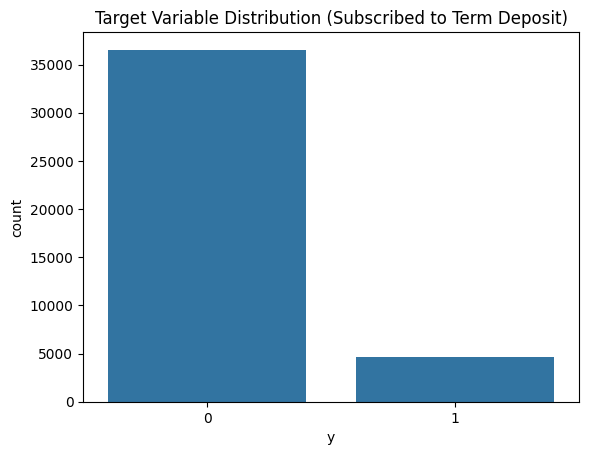

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64


In [28]:
#Target Variable Distribution
sns.countplot(data=df, x='y')
plt.title("Target Variable Distribution (Subscribed to Term Deposit)")
plt.show()

# Check imbalance
print(df['y'].value_counts(normalize=True))

#This says that 88.7% of the clients did not opted for a term deposit and only 11.3% has subscribed

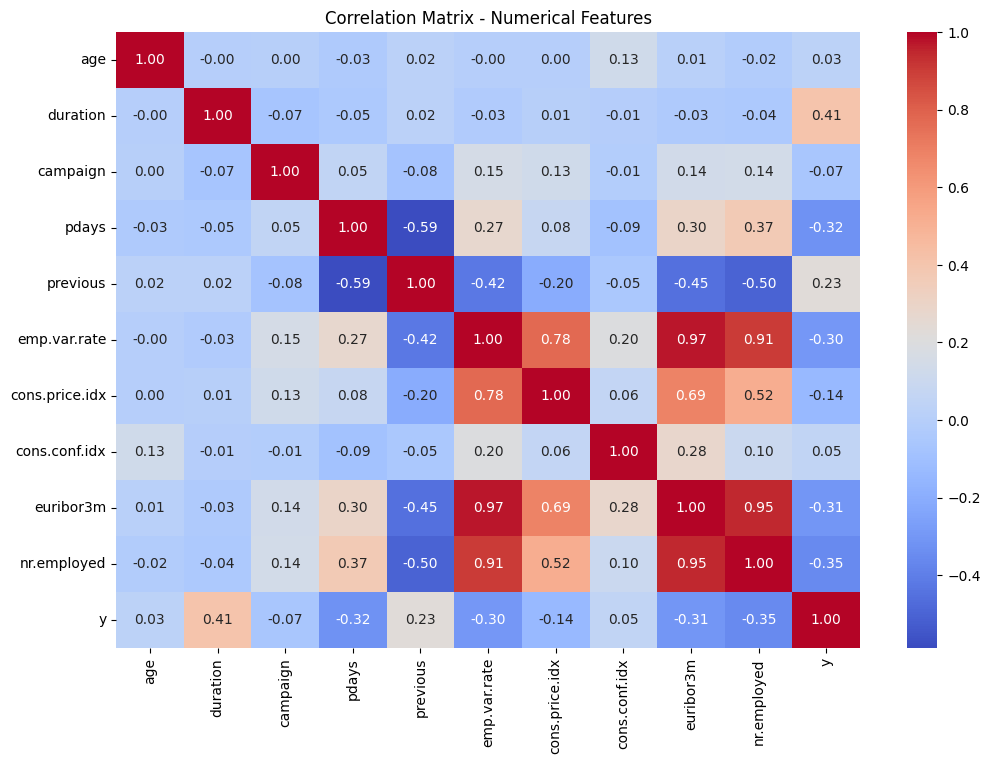

In [61]:
num_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Numerical Features")
plt.show()


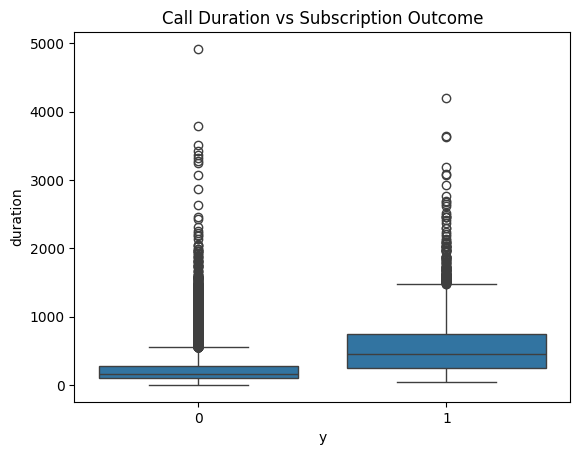

In [59]:
sns.boxplot(data=df, x='y', y='duration')
plt.title("Call Duration vs Subscription Outcome")
plt.show()

Median duration is much higher for y = 1 (subscribed) compared to y = 0.
Longer calls are strongly associated with a higher likelihood of subscription

Now we will use Logistic Regression classifier model to predict whether a customer will subscribe to a term deposit based on features like age, job, marital status, contact history

In [33]:
# Step 1: Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Step 2: Apply one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve
)
from sklearn.preprocessing import StandardScaler

In [37]:
X=df.drop('y', axis=1)
y=df['y']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [38]:
log_reg=LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

c:\Users\sravanthmandava\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [41]:
y_pred=log_reg.predict(X_test)
y_prob=log_reg.predict_proba(X_test)[:,1]

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.8606457878125758
Precision: 0.44258872651356995
Recall: 0.9137931034482759
F1 Score: 0.5963431786216596
ROC AUC: 0.9428341254304449


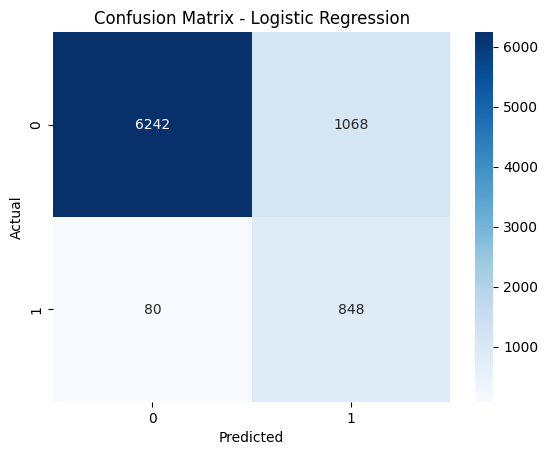

In [43]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Now we will use RandomForest classifier model for comparision

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [47]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [48]:
print("Random Forest Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest Evaluation Metrics:
Accuracy: 0.9161204175770818
Precision: 0.6933115823817292
Recall: 0.4579741379310345
F1 Score: 0.5515898767034393
ROC AUC: 0.9486917130525023


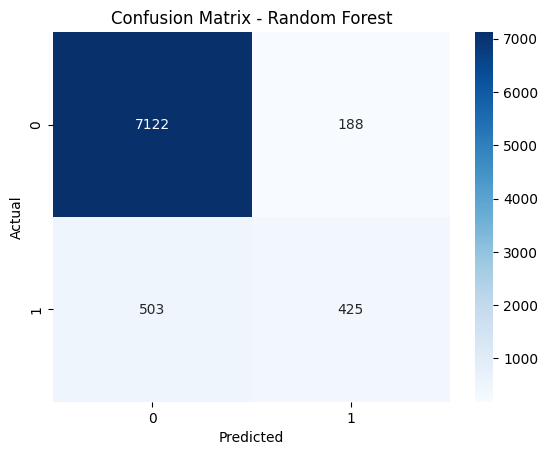

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Now we sue XGBoost

In [50]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 5.0/150.0 MB 36.8 MB/s eta 0:00:04
   ---- ----------------------------------- 16.0/150.0 MB 43.8 MB/s eta 0:00:04
   ------- -------------------------------- 27.0/150.0 MB 46.9 MB/s eta 0:00:03
   --------- ------------------------------ 36.2/150.0 MB 47.9 MB/s eta 0:00:03
   ------------ --------------------------- 46.7/150.0 MB 47.8 MB/s eta 0:00:03
   -------------- ------------------------- 56.1/150.0 MB 47.0 MB/s eta 0:00:02
   ----------------- ---------------------- 64.5/150.0 MB 46.2 MB/s eta 0:00:02
   ------------------- -------------------- 73.1/150.0 MB 45.5 MB/s eta 0:00:02
   --------------------- ------------------ 80.7/150.0 MB 44.5 MB/s eta 0:00:02
   ----------------------- ---------------- 87.6/150.0 MB 43.9 MB/s eta 0:00:02
   ------------------------- -------------- 95.2/150.0 MB 42.4 MB/s eta 0:00:02
   -------------------------- ------------ 102.2/1


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


c:\Users\sravanthmandava\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:26:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [52]:
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


In [53]:
print("XGBoost Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))


XGBoost Evaluation Metrics:
Accuracy: 0.9174556931294003
Precision: 0.658974358974359
Recall: 0.5538793103448276
F1 Score: 0.6018735362997658
ROC AUC: 0.9495963842634086


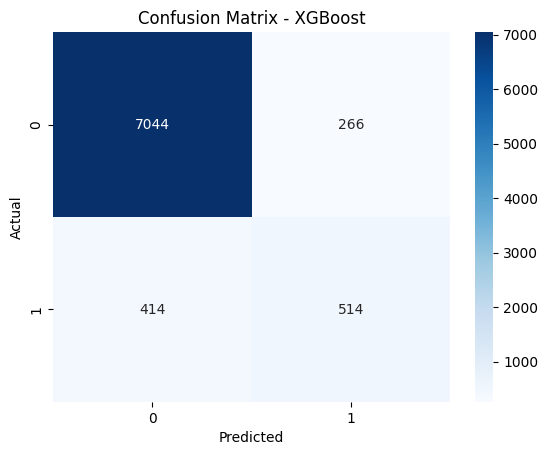

In [54]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [56]:
# Collect metrics into a dictionary
metrics = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),          # Logistic Regression
        accuracy_score(y_test, y_pred_rf),       # Random Forest
        accuracy_score(y_test, y_pred_xgb),      # XGBoost
    ],
    "Precision": [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb),
    ],
    "Recall": [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb),
    ],
    "F1 Score": [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb),
    ],
    "ROC AUC": [
        roc_auc_score(y_test, y_prob),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_xgb),
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(metrics)

# Format and display
results_df.set_index("Model", inplace=True)
results_df = results_df.round(4)  # round for cleaner output
display(results_df)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
Logistic Regression,0.8606,0.4426,0.9138,0.5963,0.9428
Random Forest,0.9161,0.6933,0.4580,0.5516,0.9487
XGBoost,0.9175,0.6590,0.5539,0.6019,0.9496


Based on the analysis of three classification models—Logistic Regression, Random Forest, and XGBoost—the XGBoost model demonstrated the best overall balance between precision, recall, and AUC, making it the most reliable choice for predicting customer subscription to term deposits. Logistic Regression excelled in recall, ensuring most potential subscribers were identified, while Random Forest achieved the highest precision, minimizing wasted marketing efforts. From a business standpoint, XGBoost offers the most strategic value by enabling targeted outreach to high-probability leads, optimizing campaign efficiency, and reducing costs. These insights empower the bank to prioritize customer segments more effectively, allocate marketing resources smarter, and ultimately improve conversion rates in future campaigns.
